## The Health Data - A Modified Problem Statement

So after Milestone 2, we went back to the drawing board and modified our problem statement.

**Our Previous Problem Statement**

Investigate whether states that have higher search intensities for pro-health words also have higher exercise and lower obesity rates.

**Our Updated Problem Statement:**

Determine how active any given state is in relation to the other states based on search behaviour



## Trying to Zoom In to Find Interesting Stories

In this milestone, our approach shifted towards a more focused analysis of the data through the utilization of data visualizations. Specifically, we chose to zoom in on select aspects of the dataset with the aim of uncovering intriguing relationships and patterns.

We start with the standard procedure: loading in the necesseary libraries and mounting the drive.

In [ ]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Mounting drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# defining the input path
input_directory = "/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/"

## Data Preprocessing & Feature Engineering

In this part, with exercise rate serving as our primary target variable of interest, we incorporated BMI values as an additional feature within our analysis. This decision was guided by the rationale that BMI can offer valuable insights into individuals' health status and may serve as an influential factor in predicting exercise rates.

To integrate BMI into our predictive framework, we performed a left join operation on the dataframes, linking them by both year and state. This approach allowed us to effectively incorporate BMI as an essential feature, enriching our dataset and enhancing our ability to predict exercise rates accurately.

Other than BMI, our other features would be the search intensities of the different health related words.

In [4]:
exercise = pd.read_csv(input_directory + "modified_exercise_data.csv")
obesity = pd.read_csv(input_directory + "modified_obesity_data.csv")

# After reading the files, we merge exercise and
exercise = exercise.rename(columns={'Data_Value': 'ExerciseRate'})
exercise = exercise.drop(['StratificationType', 'Variables'], axis=1)
obesity = obesity.rename(columns={'Data_Value': 'BMI'})

df = exercise.merge(obesity[['LocationDesc', 'Year', 'BMI']], on=['LocationDesc', 'Year'], how='left')

Let's take a look at df now:

In [5]:
df.head()

,ID,Year,LocationAbbr,LocationDesc,ExerciseRate,NIH,abdominal,aerobic exercise,apnea,best workout,...,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga,BMI
0,766058.0,2004,AL,Alabama,70.4,8,67,43,62,35,...,26,38,28,20,31,79,41,78,28,28.8
1,767216.0,2004,AK,Alaska,79.4,2,100,0,42,38,...,13,37,60,59,46,65,33,75,44,23.7
2,770141.0,2004,AZ,Arizona,75.8,5,69,25,37,10,...,30,23,31,27,16,72,33,76,72,21.2
3,771858.0,2004,AR,Arkansas,73.5,9,75,44,64,40,...,27,52,28,41,32,100,10,71,39,26.1
4,774398.0,2004,CA,California,77.3,9,56,16,35,13,...,34,36,32,16,24,50,32,66,87,22.2


### Scaling/Normalizing

In this particular phase of our study, a significant decision had to be made. Following the guidance provided in the readme, which indicated that all search intensities had been normalized to a range between 0 and 100, we opted to similarly scale the exercise rates within the same 0 to 100 range. This strategic choice was driven by the objective of constructing a more compelling narrative.

The rationale behind this decision lies in the inherent nature of the search intensity values themselves. In isolation, these values lack inherent meaning or significance; it is only through comparative analysis that they reveal insights. Notably, Google's intentional scaling of search intensity from 0 to 100, motivated by privacy concerns, underscores the importance of maintaining consistency in the nature of our data. Given that our dataset relies on meaningful comparisons between variables, aligning the target variable (exercise rates) within the same 0 to 100 scale logically enhances the coherence of our analysis.

In [6]:
# Normalizing the ExerciseRate for each year and round to 2 decimal places
df['NormalizedExerciseRate'] = df.groupby('Year')['ExerciseRate'].transform(
    lambda x: (((x - x.min()) * 100) / (x.max() - x.min())).round(2))

# Replacing the ExerciseRate column with the NormalizedExerciseRate
df['ExerciseRate'] = df['NormalizedExerciseRate']
del df['NormalizedExerciseRate']


csv_file_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/normalized_data.csv'

# Use the to_csv method to save the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)

df.head()

,ID,Year,LocationAbbr,LocationDesc,ExerciseRate,NIH,abdominal,aerobic exercise,apnea,best workout,...,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga,BMI
0,766058.0,2004,AL,Alabama,11.04,8,67,43,62,35,...,26,38,28,20,31,79,41,78,28,28.8
1,767216.0,2004,AK,Alaska,69.48,2,100,0,42,38,...,13,37,60,59,46,65,33,75,44,23.7
2,770141.0,2004,AZ,Arizona,46.10,5,69,25,37,10,...,30,23,31,27,16,72,33,76,72,21.2
3,771858.0,2004,AR,Arkansas,31.17,9,75,44,64,40,...,27,52,28,41,32,100,10,71,39,26.1
4,774398.0,2004,CA,California,55.84,9,56,16,35,13,...,34,36,32,16,24,50,32,66,87,22.2


### Generating an out-of-sample testing dataset

To better test the accuracy and generalizability of the model that we will be devloping, we have decided to split our dataset into one which will be used to train our model and a small dataset which will later be used to test the model. Given that the ML model will have no access to the smaller dataset, which will comprise of data from the year 2018 only, we believe it will be a good test for accuracy and generalizability.

In [7]:
# Import necessary libraries
import pandas as pd

# Load the dataset (Replace with your actual dataset path)
file_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/normalized_data.csv'
data = pd.read_csv(file_path)

# Filter the dataset for the year 2018
data_2018 = data[data['Year'] == 2018]

# Save the 2018 data to a new CSV file
data_2018_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/data_2018.csv'
data_2018.to_csv(data_2018_path, index=False)
print(f"2018 data saved to: {data_2018_path}")

# Filter the dataset to exclude the year 2018
data_without_2018 = data[data['Year'] != 2018]

# Save the dataset without 2018 data to a new CSV file
data_without_2018_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/data_without_2018.csv'
data_without_2018.to_csv(data_without_2018_path, index=False)
print(f"Data without 2018 saved to: {data_without_2018_path}")

data_without_2018.head()

2018 data saved to: /content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/data_2018.csv
Data without 2018 saved to: /content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/data_without_2018.csv


,ID,Year,LocationAbbr,LocationDesc,ExerciseRate,NIH,abdominal,aerobic exercise,apnea,best workout,...,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga,BMI
0,766058.0,2004,AL,Alabama,11.04,8,67,43,62,35,...,26,38,28,20,31,79,41,78,28,28.8
1,767216.0,2004,AK,Alaska,69.48,2,100,0,42,38,...,13,37,60,59,46,65,33,75,44,23.7
2,770141.0,2004,AZ,Arizona,46.10,5,69,25,37,10,...,30,23,31,27,16,72,33,76,72,21.2
3,771858.0,2004,AR,Arkansas,31.17,9,75,44,64,40,...,27,52,28,41,32,100,10,71,39,26.1
4,774398.0,2004,CA,California,55.84,9,56,16,35,13,...,34,36,32,16,24,50,32,66,87,22.2


In [8]:
data_without_2018.tail()

,ID,Year,LocationAbbr,LocationDesc,ExerciseRate,NIH,abdominal,aerobic exercise,apnea,best workout,...,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga,BMI
708,3133406.0,2017,VA,Virginia,55.92,13,72,71,85,95,...,70,68,76,71,72,81,34,96,50,30.1
709,3137446.0,2017,WA,Washington,100.00,7,67,60,77,78,...,70,73,88,83,59,73,31,82,65,27.7
710,3142087.0,2017,WV,West Virginia,18.42,7,100,81,96,91,...,82,82,71,100,77,98,31,82,34,38.1
711,3146380.0,2017,WI,Wisconsin,79.61,7,77,65,73,76,...,72,76,82,70,66,72,40,81,52,32.0
712,3150902.0,2017,WY,Wyoming,57.24,3,60,0,72,98,...,68,67,75,84,84,74,45,95,51,28.8


In [ ]:
data_2018.head()

,ID,Year,LocationAbbr,LocationDesc,ExerciseRate,NIH,abdominal,aerobic exercise,apnea,best workout,...,type 2,type 2 diabetes,unhealthy,visceral,weighing,weight loss,wellness,workout,yoga,BMI
713,3163869.0,2018,AL,Alabama,10.63,7,88,46,91,81,...,75,85,66,69,75,96,39,90,29,36.2
714,3168443.0,2018,AK,Alaska,80.00,8,82,0,90,100,...,73,86,80,66,87,68,35,95,61,29.5
715,3171618.0,2018,AZ,Arizona,64.38,6,75,46,89,84,...,68,78,77,80,63,84,40,89,53,29.5
716,3176083.0,2018,AR,Arkansas,8.75,5,89,55,80,77,...,92,82,78,67,91,87,33,82,32,37.1
717,3180363.0,2018,CA,California,71.25,8,63,47,81,79,...,65,72,92,76,72,65,34,90,61,25.8


### Picking the right features - Feature Engineering through Correlation

In the initial stage of our feature engineering, our primary task revolved around selecting features that held substantive relevance to our analysis. To achieve this objective, we conducted a thorough examination of the dataset, with a specific focus on identifying features demonstrating the highest degree of correlation with our central target variable—exercise rate.

The effectiveness of a machine learning model would be contingent upon its ability to discern meaningful patterns and relationships within the data.

We believe feature selection can help us to reduce the dimensionality of the data, thus taking care of the risk of overfitting.


In our specific context, we put an emphasis on features with the strongest correlations.

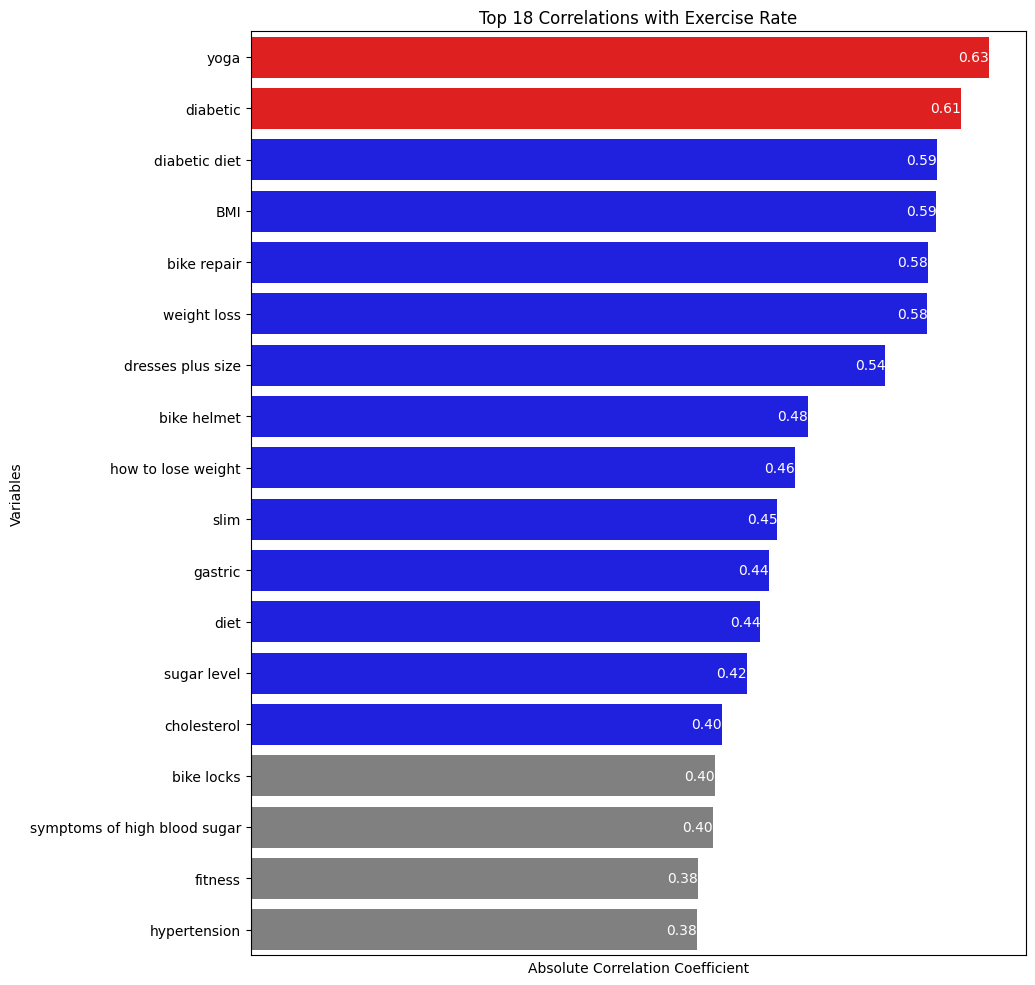

In [9]:
# Columns of interest for correlation
columns_of_interest = ['NIH',
       'abdominal', 'aerobic exercise', 'apnea', 'best workout', 'bike helmet',
       'bike laws', 'bike locks', 'bike repair', 'bike sale', 'bodybuilding',
       'calories', 'cholesterol', 'diabetes', 'diabetes insipidus',
       'diabetes insulin', 'diabetes mellitus', 'diabetes symptoms',
       'diabetic', 'diabetic diet', 'diabetic ketoacidosis', 'diet', 'dietary',
       'dresses plus size', 'e-bike', 'ejercicios', 'endocrine', 'exercise',
       'exercises', 'fitbit', 'fitness', 'fitness gym',
       'food delivery near me', 'gastric', 'glucose', 'glycogen', 'gym',
       'gym near me', 'healthy', 'how to exercise', 'how to lose weight',
       'hyperglycemia', 'hypertension', 'iPod', 'icd 10 codes', 'inactivity',
       'insanity workout', 'insulin', 'insulin syringes', 'ipod reset',
       'jogging', 'ketoacidosis', 'malnutrition', 'meals', 'my fitness pal',
       'nutrition', 'obese', 'obesity', 'pizza delivery', 'polyphagia',
       'pre workout', 'prediabetes', 'quinoa gluten free', 'sclerosis',
       'signs of diabetes', 'slim', 'sugar level',
       'symptoms of congestive heart failure', 'symptoms of diabetes',
       'symptoms of high blood sugar', 't25 schedule', 'trainer', 'type 2',
       'type 2 diabetes', 'unhealthy', 'visceral', 'weighing', 'weight loss',
       'wellness', 'workout', 'yoga', 'BMI'
]

# Calculating the correlation of these columns with ExerciseRate
correlation_data = df[['ExerciseRate'] + columns_of_interest].corr()['ExerciseRate'].drop('ExerciseRate')
correlation_data_sorted_desc = correlation_data.abs().sort_values(ascending=False)

# Updating colors based on the criteria
colors = ['red' if abs(value) > 0.6 else 'blue' if 0.4 <= abs(value) <= 0.6 else 'grey' for value in correlation_data_sorted_desc]

# Creating the plot for the top 18 variables
top_18_correlations = correlation_data_sorted_desc.head(18)
top_18_colors = colors[:18]

plt.figure(figsize=(10, 12))
sns.barplot(x=top_18_correlations.values, y=top_18_correlations.index, palette=top_18_colors)

# Adding the correlation value inside each bar on the right
for index, value in enumerate(top_18_correlations):
    plt.text(value if value > 0 else 0, index, f'{value:.2f}', color='white', va='center', ha='right', fontsize=10)

# Removing x-axis tick marks and labels
plt.xticks([])

# Removing grid lines
plt.grid(False)

plt.title('Top 18 Correlations with Exercise Rate')
plt.xlabel('Absolute Correlation Coefficient')
plt.ylabel('Variables')
plt.show()

### Getting Feature Importance through  Random Forest

Feature importance in the context of a Random Forest is a measure that helps to understand the contribution of each feature in the dataset to the prediction made by the model. In simpler terms, it tells us which features (or input variables) are most influential in predicting the target variable.

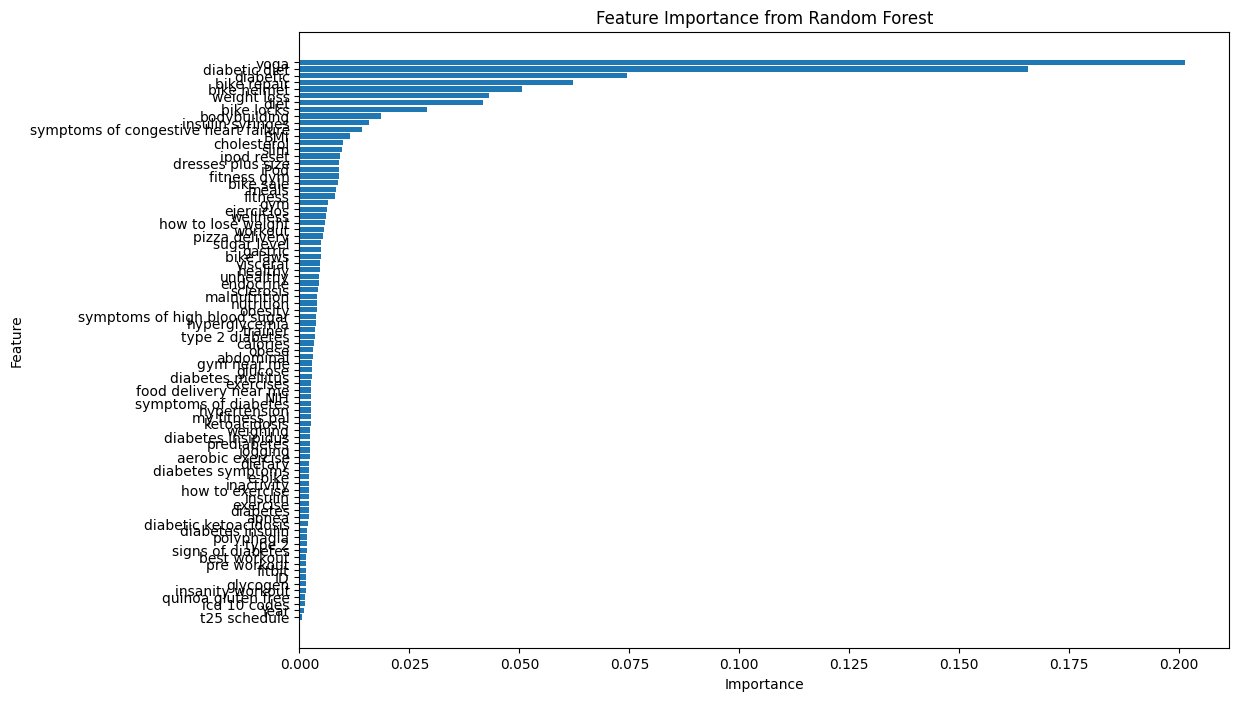

['yoga', 'diabetic diet', 'diabetic', 'bike repair', 'bike helmet', 'weight loss', 'diet', 'bike locks']


In [10]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

# loading  dataset
path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/normalized_data.csv'
data = pd.read_csv(path)

data.drop('LocationAbbr', axis=1, inplace=True)


# dropping the original 'LocationDesc' column
data.drop('LocationDesc', axis=1, inplace=True)

# preparing features and target variable
X = data.drop('ExerciseRate', axis=1)  # Features
y = data['ExerciseRate']  # Target variable

# fitting a random forest to the data to get feature importances
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X, y)

# getting feature importances
importances = rf.feature_importances_

# converting the importances into a DataFrame
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# sorting the DataFrame to find the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# visualizing  feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()
plt.show()

# selecting a threshold for feature importance
importance_threshold = 0.02

# selecting the features passing the importance threshold
selected_features = feature_importance_df[feature_importance_df['Importance'] > importance_threshold]['Feature'].tolist()

print(selected_features)



The important point here is that all the most important features(as suggested by the random forest)

## Some Interesting Visualizations Before Moving On

Before we move on to creating and evaluating models, let's try to look at the plots of the most correlated features (just for fun)

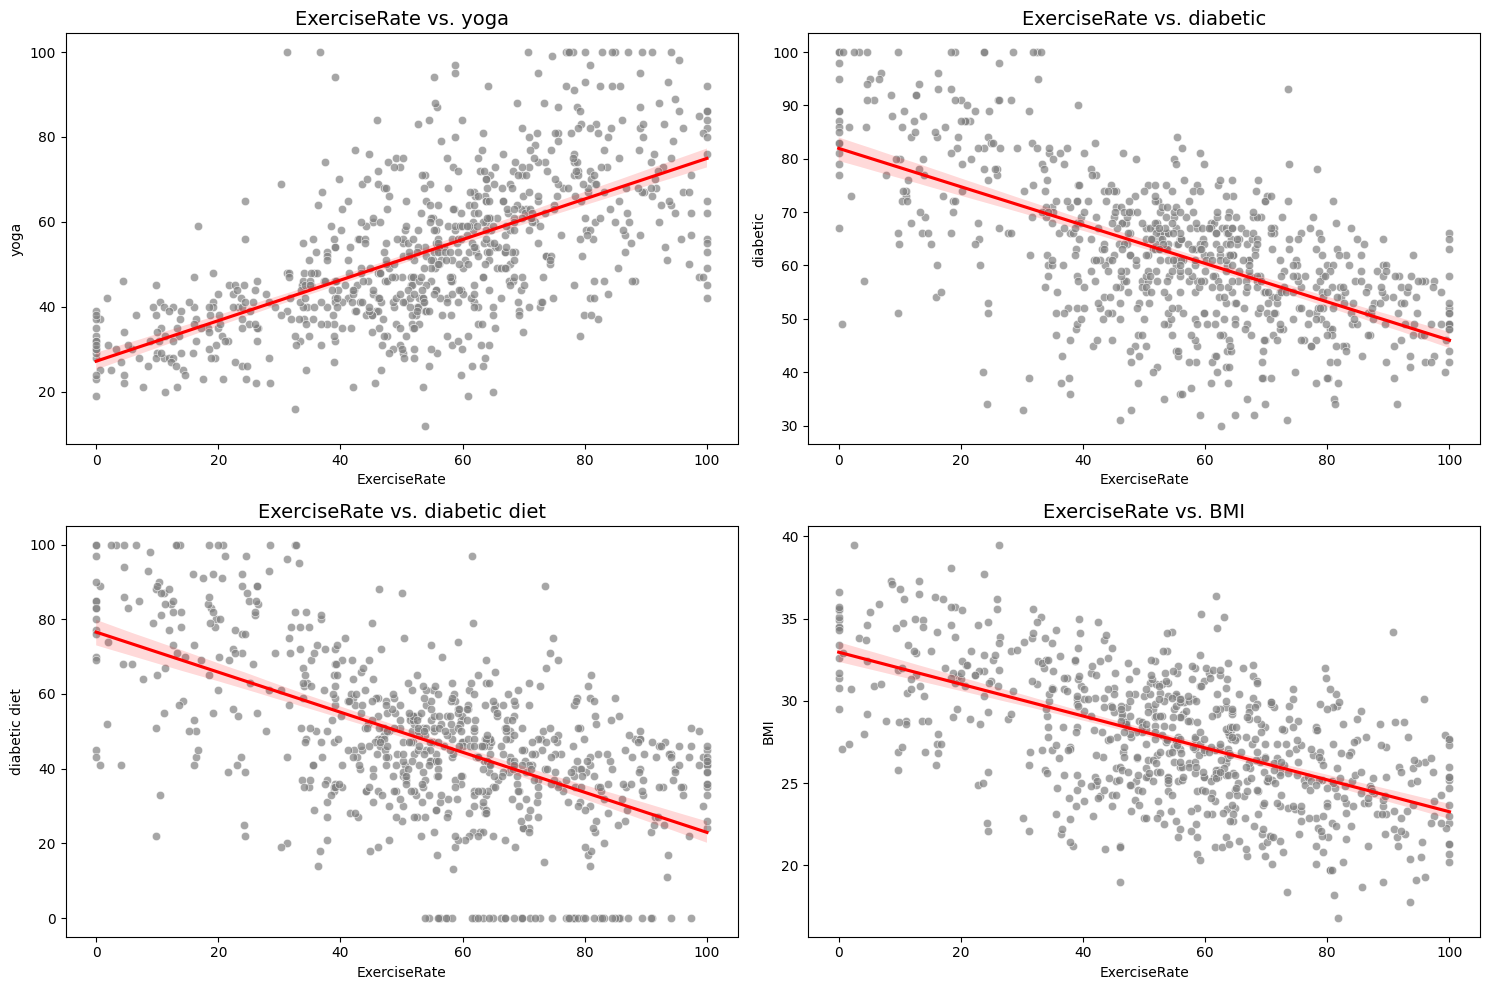

In [11]:
# Setting up the figure for four subplots
plt.figure(figsize=(15, 10))

# Variables of interest
variables_of_interest = ['yoga', 'diabetic', 'diabetic diet', 'BMI']

# Creating each subplot
for i, variable in enumerate(variables_of_interest, 1):
    plt.subplot(2, 2, i)
    sns.scatterplot(x=df['ExerciseRate'], y=df[variable], color='grey', alpha=0.7)
    sns.regplot(x=df['ExerciseRate'], y=df[variable], scatter=False, color='red')
    plt.title(f'ExerciseRate vs. {variable}', fontsize=14)
    plt.xlabel('ExerciseRate')
    plt.ylabel(variable)

# Adjusting layout for readability
plt.tight_layout()

# Show plot
plt.show()

## Model Selection and Training

In this section, we will focus on training different machine learning models. Given our limited understanding of the math underlying the functioning of the different models, it is difficult for us to choose a model based on how the data in our dataset is distributed. For this reason, we have decided to opt for a more "brute-force" approach, where we test various models and choose the best performing one.

Note: Given that we are ultimately trying to predict a continuos variable, we will use mostly regression-based models instead of classification-based models

### Loading the train and test datasets

In [12]:
# importing necessary libraries
import pandas as pd

# loading the training and testing data
train_data = pd.read_csv('/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/data_without_2018.csv')
test_data = pd.read_csv('/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/data_2018.csv')

# analyzing correlations for feature selection
# selecting only features which have a correlation of more than 0.379 with 'outcome' variable as per the above diagram
correlations = train_data.corr()['ExerciseRate']
selected_features = correlations[abs(correlations) > 0.379].index.drop('ExerciseRate')


<ipython-input-12-82e39b527ffb>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = train_data.corr()['ExerciseRate']


###Training linear regression-based ML models  without and with feature engineering respectively

Next, we move on to training lunear regression based models on our data

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score  # Import mean_absolute_error

features = train_data.columns.drop(['ID', 'Year', 'LocationAbbr', 'LocationDesc', 'ExerciseRate'])

# splitting the dataset into training and test sets
X = train_data[features]
y = train_data['ExerciseRate']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# training the model with all features
model_all = LinearRegression()
model_all.fit(X_train, y_train)

# evaluating the model with all features
predictions_test_all = model_all.predict(X_test)
mae_test_all = mean_absolute_error(y_test, predictions_test_all)  # Calculate MAE
r2_test_all = r2_score(y_test, predictions_test_all)

# training the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
model_selected = LinearRegression()
model_selected.fit(X_train_selected, y_train)

# evaluating the model with selected features
predictions_test_selected = model_selected.predict(X_test_selected)
mae_test_selected = mean_absolute_error(y_test, predictions_test_selected)  # Calculate MAE
r2_test_selected = r2_score(y_test, predictions_test_selected)

# outputting the evaluation results
print("Test Results for Model with All Features:")
print("Mean Absolute Error:", mae_test_all)  # Output MAE
print("R-squared:", r2_test_all)

print("\nTest Results for Model with Selected Features:")
print("Mean Absolute Error:", mae_test_selected)  # Output MAE
print("R-squared:", r2_test_selected)


Test Results for Model with All Features:
Mean Absolute Error: 10.31628867658666
R-squared: 0.7626812424701853

Test Results for Model with Selected Features:
Mean Absolute Error: 12.391652361794186
R-squared: 0.6715835764593165


We also try to run and evaluate Lasso and Ridge models.

In [14]:
from sklearn.linear_model import Lasso, Ridge

# lasso regression
model_lasso = Lasso(alpha=0.1, random_state=42)
model_lasso.fit(X_train, y_train)

# evaluating the lasso model
predictions_lasso = model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, predictions_lasso)
r2_lasso = r2_score(y_test, predictions_lasso)

print("Test Results for Lasso Model:")
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)

# ridge regression
model_ridge = Ridge(alpha=1.0, random_state=42)
model_ridge.fit(X_train, y_train)

# evaluating the ridge model
predictions_ridge = model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, predictions_ridge)
r2_ridge = r2_score(y_test, predictions_ridge)

print("\nTest Results for Ridge Model:")
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)


Test Results for Lasso Model:
Mean Absolute Error: 10.310014035224354
R-squared: 0.7638475207050267

Test Results for Ridge Model:
Mean Absolute Error: 10.316568771185704
R-squared: 0.7626847833964174


With GridSearch CV, we look to tune our model to better suit our needs

In [15]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV

# define the parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# lasso regression with GridSearchCV
lasso = Lasso(random_state=42)
grid_search_lasso = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_lasso.fit(X_train, y_train)

# best alpha parameter for Lasso
best_alpha_lasso = grid_search_lasso.best_params_['alpha']
print("Best alpha for Lasso:", best_alpha_lasso)

# evaluating the Lasso model with the best alpha
model_lasso = Lasso(alpha=best_alpha_lasso, random_state=0)
model_lasso.fit(X_train, y_train)
predictions_lasso = model_lasso.predict(X_test)
mae_lasso = mean_absolute_error(y_test, predictions_lasso)
r2_lasso = r2_score(y_test, predictions_lasso)

print("Test Results for Lasso Model with Best alpha:")
print("Mean Absolute Error:", mae_lasso)
print("R-squared:", r2_lasso)

# ridge regression with GridSearchCV
ridge = Ridge(random_state=0)
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
grid_search_ridge.fit(X_train, y_train)

# best alpha parameter for Ridge
best_alpha_ridge = grid_search_ridge.best_params_['alpha']
print("Best alpha for Ridge:", best_alpha_ridge)

# evaluating the Ridge model with the best alpha
model_ridge = Ridge(alpha=best_alpha_ridge, random_state=42)
model_ridge.fit(X_train, y_train)
predictions_ridge = model_ridge.predict(X_test)
mae_ridge = mean_absolute_error(y_test, predictions_ridge)
r2_ridge = r2_score(y_test, predictions_ridge)

print("\nTest Results for Ridge Model with Best alpha:")
print("Mean Absolute Error:", mae_ridge)
print("R-squared:", r2_ridge)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.896e+01, tolerance: 2.488e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.907e+02, tolerance: 2.382e+01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.292e+01, tolerance: 2.415e

Best alpha for Lasso: 10
Test Results for Lasso Model with Best alpha:
Mean Absolute Error: 11.208085596484784
R-squared: 0.7415873548123771
Best alpha for Ridge: 100

Test Results for Ridge Model with Best alpha:
Mean Absolute Error: 10.341866223731277
R-squared: 0.7629728958954347


###Testing the ML models based on out-of-sample data

We also tried (just in case) ML models with all the features, who knows what we might find.

In [16]:
# preparing out-of-sample test data for the model with all features
X_out_of_sample_all = test_data[features]
y_out_of_sample = test_data['ExerciseRate']

# predicting and evaluating the model with all features on out-of-sample data
predictions_out_all = model_all.predict(X_out_of_sample_all)
mae_out_all = mean_absolute_error(y_out_of_sample, predictions_out_all)  # Calculate MAE
r2_out_all = r2_score(y_out_of_sample, predictions_out_all)

# preparing out-of-sample test data for the model with selected features
X_out_of_sample_selected = test_data[selected_features]


# predicting and evaluating the model with selected features on out-of-sample data
predictions_out_selected = model_selected.predict(X_out_of_sample_selected)
mae_out_selected = mean_absolute_error(y_out_of_sample, predictions_out_selected)  # Calculate MAE
r2_out_selected = r2_score(y_out_of_sample, predictions_out_selected)

# outputting the evaluation results for out-of-sample data
print("Out-of-Sample Test Results for Model with All Features:")
print("Mean Absolute Error:", mae_out_all)  # Output MAE
print("R-squared:", r2_out_all)

print("\nOut-of-Sample Test Results for Model with Selected Features:")
print("Mean Absolute Error:", mae_out_selected)  # Output MAE
print("R-squared:", r2_out_selected)

# creating a new DataFrame with state, actual ExerciseRate for 2018, and predicted ExerciseRate
results_df = test_data[['LocationDesc', 'ExerciseRate']]
results_df['PredictedExerciseRate_All'] = predictions_out_all  # or use predictions_out_selected for the other model
results_df['PredictedExerciseRate_Selected'] = predictions_out_selected

# saving the results to a CSV file
output_file_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/predictions1_2018.csv'
results_df.to_csv(output_file_path, index=False)


Out-of-Sample Test Results for Model with All Features:
Mean Absolute Error: 10.434620207291346
R-squared: 0.7201239094972212

Out-of-Sample Test Results for Model with Selected Features:
Mean Absolute Error: 11.757557358602922
R-squared: 0.6620841634651473


<ipython-input-16-117e4d9fc716>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['PredictedExerciseRate_All'] = predictions_out_all  # or use predictions_out_selected for the other model
<ipython-input-16-117e4d9fc716>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['PredictedExerciseRate_Selected'] = predictions_out_selected


Interestingly, and quite intriguingly, when we use all the features, instead of picking around the most correlated features, we get a better model, as evidenced by our metrics MAE and R squared

In [17]:
results_df.head()

,LocationDesc,ExerciseRate,PredictedExerciseRate_All,PredictedExerciseRate_Selected
0,Alabama,10.63,10.618580,13.258620
1,Alaska,80.00,60.018091,71.739667
2,Arizona,64.38,48.000812,52.833603
3,Arkansas,8.75,10.000831,1.936664
4,California,71.25,62.462831,65.832568


###Visualizing the differences between predicted rates for Out-of-Sample data and Actual rates

Okay there are too many numbers at this point, let us try to look at a visual representation to get a better sense of our models and their performance.

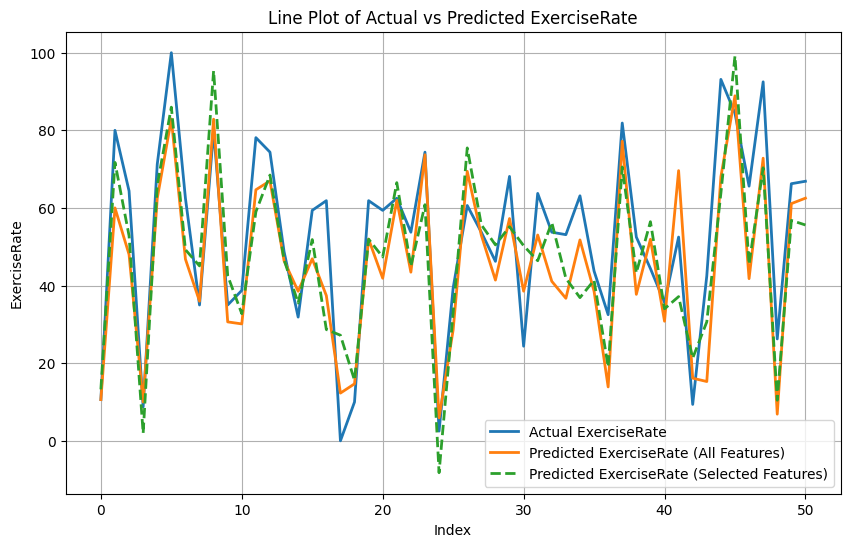

In [18]:
# importing necessary libraries for visualization
import matplotlib.pyplot as plt

# creating a line plot for a more direct comparison
# line plot for actual vs predicted ExerciseRate
plt.figure(figsize=(10, 6))
plt.plot(results_df['ExerciseRate'], label='Actual ExerciseRate', linewidth=2)
plt.plot(results_df['PredictedExerciseRate_All'], label='Predicted ExerciseRate (All Features)', linewidth=2)
plt.plot(results_df['PredictedExerciseRate_Selected'], label='Predicted ExerciseRate (Selected Features)', linewidth=2, linestyle='--')
plt.title('Line Plot of Actual vs Predicted ExerciseRate')
plt.xlabel('Index')
plt.ylabel('ExerciseRate')
plt.legend()
plt.grid(True)
plt.show()


To our delight, we see that our predictions (regardless of whether we chose all features or did feature selection), match the trend of the data quite similarly. This means while our actual numbers might be off, on a comparative level, we can tell quite an accurate story about which states are more active than others.

####Diagram 2: Barchart to illustrate differences between actual and predicted rates

A bar chart gives a more clearer picture of what we just mentioned in the last section about impressive comparability between predictions and actual rates.

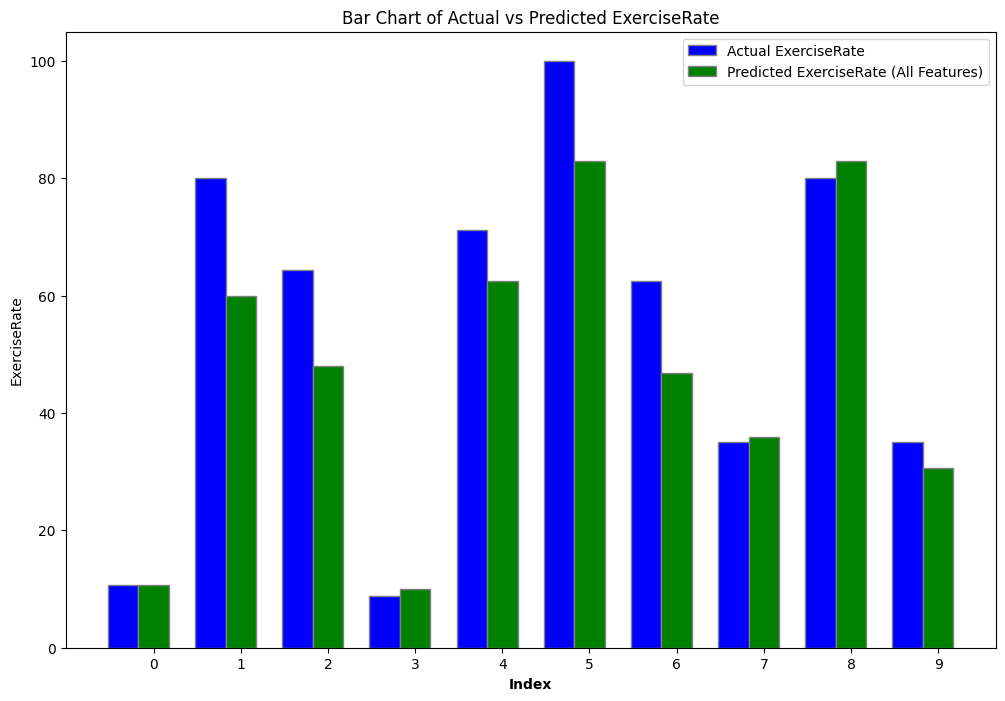

In [19]:
# selecting a subset of the data for a clear bar chart
subset_results_df = results_df.head(10)

# defining the width of the bars
bar_width = 0.35

# setting the positions of the bars
r1 = range(len(subset_results_df))
r2 = [x + bar_width for x in r1]

# creating the bar chart
plt.figure(figsize=(12, 8))

# creating bars for actual ExerciseRate
plt.bar(r1, subset_results_df['ExerciseRate'], width=bar_width, color='blue', edgecolor='grey', label='Actual ExerciseRate')

# creating bars for predicted ExerciseRate with all features
plt.bar(r2, subset_results_df['PredictedExerciseRate_All'], width=bar_width, color='green', edgecolor='grey', label='Predicted ExerciseRate (All Features)')

# adding labels to the chart
plt.xlabel('Index', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(subset_results_df))], subset_results_df.index)
plt.ylabel('ExerciseRate')
plt.title('Bar Chart of Actual vs Predicted ExerciseRate')

# Create legend & Show graphic
plt.legend()
plt.show()


In [ ]:
We predict using the Lasso model:

In [21]:
# predicting and evaluating the Lasso model on out-of-sample data
predictions_out_lasso = model_lasso.predict(X_out_of_sample_all)
mae_out_lasso = mean_absolute_error(y_out_of_sample, predictions_out_lasso)
r2_out_lasso = r2_score(y_out_of_sample, predictions_out_lasso)

# predicting and evaluating the Ridge model on out-of-sample data
predictions_out_ridge = model_ridge.predict(X_out_of_sample_all)
mae_out_ridge = mean_absolute_error(y_out_of_sample, predictions_out_ridge)
r2_out_ridge = r2_score(y_out_of_sample, predictions_out_ridge)

# outputting the evaluation results for out-of-sample data
print("Out-of-Sample Test Results for Lasso Model:")
print("Mean Absolute Error:", mae_out_lasso)
print("R-squared:", r2_out_lasso)

print("\nOut-of-Sample Test Results for Ridge Model:")
print("Mean Absolute Error:", mae_out_ridge)
print("R-squared:", r2_out_ridge)

# adding predictions to the DataFrame
results_df['PredictedExerciseRate_Lasso'] = predictions_out_lasso
results_df['PredictedExerciseRate_Ridge'] = predictions_out_ridge

# saving the results to a CSV file
output_file_path = '/content/drive/MyDrive/Fall 2023/Applied Data Science/datasets/m3/predictions1_2018.csv'
results_df.to_csv(output_file_path, index=False)


Out-of-Sample Test Results for Lasso Model:
Mean Absolute Error: 8.385387554392294
R-squared: 0.8128609917612073

Out-of-Sample Test Results for Ridge Model:
Mean Absolute Error: 10.307262133278599
R-squared: 0.7263613750036864


<ipython-input-21-b3613ac0376d>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['PredictedExerciseRate_Lasso'] = predictions_out_lasso
<ipython-input-21-b3613ac0376d>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df['PredictedExerciseRate_Ridge'] = predictions_out_ridge


In [ ]:
results_df.head()

,LocationDesc,ExerciseRate,PredictedExerciseRate_All,PredictedExerciseRate_Selected,PredictedExerciseRate_Lasso,PredictedExerciseRate_Ridge
0,Alabama,10.63,10.618580,13.258620,8.637795,10.711887
1,Alaska,80.00,60.018091,71.739667,76.011012,60.147748
2,Arizona,64.38,48.000812,52.833603,52.962470,48.172539
3,Arkansas,8.75,10.000831,1.936664,10.936529,10.159738
4,California,71.25,62.462831,65.832568,61.907574,62.468758


## So, which states are more active than others?

Like we set out to do, let's see which states are more active than others, based on our predictions.


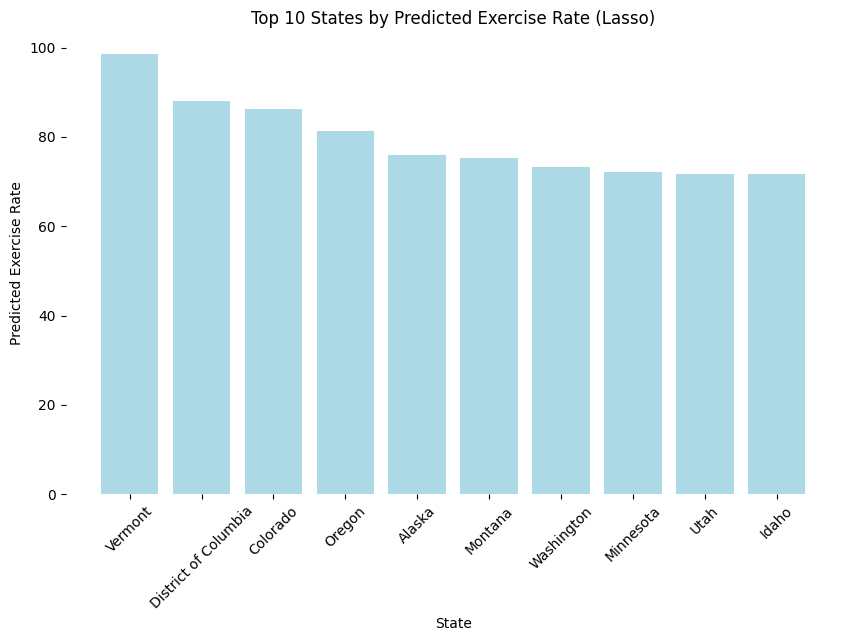

In [22]:
results_df

results_df.to_csv(input_directory + "results_df.csv")

# Sort the data in descending order of PredictedExerciseRate_Lasso
sorted_data = results_df.sort_values(by='PredictedExerciseRate_Lasso', ascending=False)

# Select the top 5 rows
top_five = sorted_data.head(10)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_five['LocationDesc'], top_five['PredictedExerciseRate_Lasso'], color='lightblue')

# Remove the borders
ax = plt.gca()
for spine in ax.spines.values():
    spine.set_visible(False)

plt.xlabel('State')
plt.ylabel('Predicted Exercise Rate')
plt.title('Top 10 States by Predicted Exercise Rate (Lasso)')
plt.xticks(rotation=45)
plt.show()

## Concluding Remarks

In this milestone we aimed to create a model that will, at the very least, give a very accurate representation of how active any given state is in relation to the other states based on search behaviour. While doing this milestone, we encountered a lot of hurdles, to say the very least. After trying out multiple models (even doing messy trails and errors of models that aren't even in the notebook) we overwhelmingly saw that it was difficult to predict the exercise rates of any given state given their search behavior. What we can say confidently, however, is the fact that our chosen models do an excellent job in giving us a look at the comparative standings of the states (as shown in our analysis using plots and figures).

However, what we would like to conclude on, is that we realized it's quite difficult to accurately predict exercise rates based on search behaviors only. In other words, in our general consensus, search behavior might not be the only thing that can predict exercise rates. In fact there might be so many other factors involved. But we believe there is still some stories to be told here, and what we did might just be stepping stone to much larger scopes of research.